# **DATA CLEASING(Limpieza de datos)**
La limpieza de datos es el proceso de identificar y corregir datos corruptos, incompletos, duplicados, incorrectos e irrelevantes de un conjunto de referencia, tabla o base de datos. 

Los problemas de datos suelen surgir a través de errores de entrada del usuario, captura de datos incompleta, formatos no estándar y problemas de integración de datos.


<img src="https://mlt24cspfhbn.i.optimole.com/-ALoOU0.hQGL~11bc/w:1200/h:938/q:100/https://www.iteratorshq.com/wp-content/uploads/2020/09/data_cleaning_cycle.jpg" width=500, height=350  class=center/>


**PUNTOS CLAVES**

1.   Análisis de datos
2.   Filtrado de dataframe
2.   Creación funciones de limpieza y análisis
4.   eliminación de repetidos
5.   ordenamiento
6.   traspuesta de datos
7.   matriz de co-ocurrencias
8.   mapas de calor
9.   graficar


## **CONSIDERACIONES ESPECIALES**
### **1. Normalizar el texto:**

  *   Todo en mayúscula o minúscula
  *   Quitar posibles espacios: 
  *   Quitar nulos 
  *   Homologar categorías

### **2. Manejo de duplicados**

En un texto los duplicados no siempre son considerados "basura", pero en el contexto de palabras claves en el texto no tiene sentido tener palabras duplicadas.

Nota: Los duplicados se deben eliminar después de normalizar el texto, porque por ej un espacio puede hacer que dos palabras se consideren diferentes. 

### **3. Cálculo de frecuencias**
Luego de normalizado el texto se calculan las frecuencias 

La librería NLTK tiene una función FreqDist, para calcular las frecuencias de las palabras en un texto. 

Las frecuencias también se puedes calcular con diccionarios y la librería pandas.

### **4. Consideraciones Pandas**
Para eliminar los documentos que no contienen al menos una de las palabras más frecuencias se debe sumar por filas
*    axis= 0 actua en todas filas de cada columna #horizontal

Al momento de la validación tener en cuenta que se necesita sumar la matriz documento término  columnas
*    axis= 1 actua en las columnas de cada fila  #vertical

# **EJEMPLO PRÁCTICO**

In [78]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import warnings

# ignorando warnings para mejor limpieza de codigo
warnings.filterwarnings("ignore")

df = pd.read_csv("https://gitlab.com/luisvasv/public/-/raw/master/datasets/004.mock.data/001.dependents.csv")
df

first_name last_name                                   email_dependents
0      Alvis   Yeoland  cfowellsd@apache.org,Dcastello2l@homestead.com...
1     Finley   Ziemsen  ecloakei@oaic,fhubeauxa@google.com.br,tkemwall...
2      Corie     Snary  cfowellsd@apache.org,kpeggrame@weibo.com,kpegg...
3     Byrann   Kliment              ecloakei@oaic.gov.au, kpeggrame@weibo
4     Artair  Quarless  cfowellsd@apache.org,kpeggrame@weibo.com,aspar...

In [ ]:
# encabezado
df.head()

first_name last_name                                   email_dependents
0      Alvis   Yeoland  cfowellsd@apache.org,Dcastello2l@homestead.com...
1     Finley   Ziemsen  ecloakei@oaic,fhubeauxa@google.com.br,tkemwall...
2      Corie     Snary  cfowellsd@apache.org,kpeggrame@weibo.com,kpegg...
3     Byrann   Kliment              ecloakei@oaic.gov.au, kpeggrame@weibo
4     Artair  Quarless  cfowellsd@apache.org,kpeggrame@weibo.com,aspar...

In [ ]:
# pie de pagina
df.tail()

first_name last_name                                   email_dependents
0      Alvis   Yeoland  cfowellsd@apache.org,Dcastello2l@homestead.com...
1     Finley   Ziemsen  ecloakei@oaic,fhubeauxa@google.com.br,tkemwall...
2      Corie     Snary  cfowellsd@apache.org,kpeggrame@weibo.com,kpegg...
3     Byrann   Kliment              ecloakei@oaic.gov.au, kpeggrame@weibo
4     Artair  Quarless  cfowellsd@apache.org,kpeggrame@weibo.com,aspar...

In [ ]:
df.head(2)

first_name last_name                                   email_dependents
0      Alvis   Yeoland  cfowellsd@apache.org,Dcastello2l@homestead.com...
1     Finley   Ziemsen  ecloakei@oaic,fhubeauxa@google.com.br,tkemwall...

In [ ]:
# filtrado de filas
df[0:3]

first_name last_name                                   email_dependents
0      Alvis   Yeoland  cfowellsd@apache.org,Dcastello2l@homestead.com...
1     Finley   Ziemsen  ecloakei@oaic,fhubeauxa@google.com.br,tkemwall...
2      Corie     Snary  cfowellsd@apache.org,kpeggrame@weibo.com,kpegg...

In [ ]:
# truco para crear atributos dinamicos
class Constantes:
  pass

constantes = Constantes()
constantes.DELIMETER = ","

In [ ]:
# funciones analisis

def analisis_emails(dato):
  elementos = dato.split(constantes.DELIMETER)
  conteos = dict(zip(elementos,map(lambda elemto: elementos.count(elemto),elementos)))
  valores = conteos.values()
  filtrado= filter(lambda dato: dato >1,valores)
  return len(elementos), sum(filtrado)

df["num_emails"], df["repeated"] = zip(*df["email_dependents"].map(analisis_emails)) 
df 

first_name last_name  ... num_emails  repeated
0      Alvis   Yeoland  ...         11         0
1     Finley   Ziemsen  ...          4         0
2      Corie     Snary  ...          4         3
3     Byrann   Kliment  ...          2         0
4     Artair  Quarless  ...          6         2

[5 rows x 5 columns]

In [ ]:
# forma 1 - lambdas
list(df["email_dependents"].map(str.lower).map(lambda dato: dato.replace(" ","")).map(lambda dato: dato.strip()))[:3]

['cfowellsd@apache.org,dcastello2l@homestead.com,fziemsen1@themeforest.net,csnary2@instagram.com,bkliment3@nationalgeographic.com,aquarless4@technorati.com,ggalbraeth5@arizona.edu,rpowton6@instagram.com,adressel7@icq.com,kegginson8@cdbaby.com,nvears9@ifeng.com',
 'ecloakei@oaic,fhubeauxa@google.com.br,tkemwallb@1und1.de,toldknowc@nymag.com',
 'cfowellsd@apache.org,kpeggrame@weibo.com,kpeggrame@weibo.com,kpeggrame@weibo.com']

### Limpieza de texto

In [ ]:
def limpieza(email):
  email = email.lower()
  email = email.replace(" ","")
  email = email.strip()
  elementos = email.split(constantes.DELIMETER)
  return list(set(elementos))

concatenar = []

for emails in list(df["email_dependents"]):
  for email in limpieza(emails):
    concatenar.append(email)
#oncatenar.extend([limpieza(emails) for emails in list(df["email_dependents"]) ])
concatenar


['ggalbraeth5@arizona.edu',
 'kegginson8@cdbaby.com',
 'aquarless4@technorati.com',
 'nvears9@ifeng.com',
 'fziemsen1@themeforest.net',
 'bkliment3@nationalgeographic.com',
 'rpowton6@instagram.com',
 'adressel7@icq.com',
 'csnary2@instagram.com',
 'cfowellsd@apache.org',
 'dcastello2l@homestead.com',
 'toldknowc@nymag.com',
 'ecloakei@oaic',
 'fhubeauxa@google.com.br',
 'tkemwallb@1und1.de',
 'cfowellsd@apache.org',
 'kpeggrame@weibo.com',
 'ecloakei@oaic.gov.au',
 'kpeggrame@weibo',
 'lbransbyh@example.com',
 'glastg@pcworld.com',
 'cfowellsd@apache.org',
 'asparrowef@naver.com',
 'kpeggrame@weibo.com']

### Frecuencias

In [ ]:
# forma 1
frecuencias = nltk.FreqDist(concatenar)
print(frecuencias)
key_list = list()
key_val = list()
df_values = pd.DataFrame(columns=["key", "val"])
for key,val in frecuencias.items():
  key_list.append(key)
  key_val.append(val)

df_values["key"]= key_list
df_values["val"]= key_val
df_values  

<FreqDist with 21 samples and 24 outcomes>


key  val
0            ggalbraeth5@arizona.edu    1
1              kegginson8@cdbaby.com    1
2          aquarless4@technorati.com    1
3                  nvears9@ifeng.com    1
4          fziemsen1@themeforest.net    1
5   bkliment3@nationalgeographic.com    1
6             rpowton6@instagram.com    1
7                  adressel7@icq.com    1
8              csnary2@instagram.com    1
9               cfowellsd@apache.org    3
10         dcastello2l@homestead.com    1
11               toldknowc@nymag.com    1
12                     ecloakei@oaic    1
13           fhubeauxa@google.com.br    1
14                tkemwallb@1und1.de    1
15               kpeggrame@weibo.com    2
16              ecloakei@oaic.gov.au    1
17                   kpeggrame@weibo    1
18             lbransbyh@example.com    1
19                glastg@pcworld.com    1
20              asparrowef@naver.com    1

In [ ]:
elementos = {}
for email in concatenar:
  elementos[email] = elementos.get(email,0) + 1
elementos
# para que se diviertan

{'adressel7@icq.com': 1,
 'aquarless4@technorati.com': 1,
 'asparrowef@naver.com': 1,
 'bkliment3@nationalgeographic.com': 1,
 'cfowellsd@apache.org': 3,
 'csnary2@instagram.com': 1,
 'dcastello2l@homestead.com': 1,
 'ecloakei@oaic': 1,
 'ecloakei@oaic.gov.au': 1,
 'fhubeauxa@google.com.br': 1,
 'fziemsen1@themeforest.net': 1,
 'ggalbraeth5@arizona.edu': 1,
 'glastg@pcworld.com': 1,
 'kegginson8@cdbaby.com': 1,
 'kpeggrame@weibo': 1,
 'kpeggrame@weibo.com': 2,
 'lbransbyh@example.com': 1,
 'nvears9@ifeng.com': 1,
 'rpowton6@instagram.com': 1,
 'tkemwallb@1und1.de': 1,
 'toldknowc@nymag.com': 1}

In [ ]:
# ordenamiento ejemplo
df_sort = df_values.sort_values(by = ["val"], ascending=False, ignore_index= True)  
df_sort.head(5)

key  val
0     cfowellsd@apache.org    3
1      kpeggrame@weibo.com    2
2  ggalbraeth5@arizona.edu    1
3      toldknowc@nymag.com    1
4       glastg@pcworld.com    1

In [ ]:
#tomamos muestras
df_cinco = df_sort[0:5]
df_cinco

key  val
0     cfowellsd@apache.org    3
1      kpeggrame@weibo.com    2
2  ggalbraeth5@arizona.edu    1
3      toldknowc@nymag.com    1
4       glastg@pcworld.com    1

### Matriz documento término

In [ ]:
keywords = list(df["email_dependents"])

names_cols = list(df_cinco["key"])
vacia = np.full((len(keywords),len(df_cinco)),0)

mdt = pd.DataFrame(vacia, columns= names_cols)
for index in range(len(keywords)):
  text = keywords[index] 
  text1 = str(text).split(constantes.DELIMETER)
  for internal_index in range(len(text1)):
    text2 = text1[internal_index]
    t_lower = str.lower(text2)
    t_lower_ = t_lower.strip()
    for k in names_cols:
      if t_lower_ == k:
        mdt[k][index] = 1

mdt

cfowellsd@apache.org  ...  glastg@pcworld.com
0                     1  ...                   0
1                     0  ...                   0
2                     1  ...                   0
3                     0  ...                   0
4                     1  ...                   1

[5 rows x 5 columns]

In [ ]:
mdt_temp = mdt.copy()
mdt_temp['sum'] = mdt_temp.sum(axis= 1)
mdt_temp = mdt_temp.drop(mdt_temp[mdt_temp['sum']==0].index)
mdt_temp.shape  
mdt_temp

cfowellsd@apache.org  kpeggrame@weibo.com  ...  lbransbyh@example.com  sum
0                     1                    0  ...                      0    2
1                     0                    0  ...                      0    1
2                     1                    1  ...                      0    2
4                     1                    1  ...                      1    3

[4 rows x 6 columns]

### Matriz de co -ocurrencias

In [ ]:
mdt_t = np.transpose(mdt)
co_ocurrencias = np.dot(mdt_t, mdt)
co_ocurrencias = pd.DataFrame(co_ocurrencias, columns= names_cols, index=names_cols)
co_ocurrencias

cfowellsd@apache.org  ...  glastg@pcworld.com
cfowellsd@apache.org                        3  ...                   1
kpeggrame@weibo.com                         2  ...                   1
ggalbraeth5@arizona.edu                     1  ...                   0
toldknowc@nymag.com                         0  ...                   0
glastg@pcworld.com                          1  ...                   1

[5 rows x 5 columns]

In [ ]:
c = df.corr()
sns.heatmap(c)
sns.heatmap(co_ocurrencias, annot=True, cbar=None, cmap="Blues")
plt.title("Mapa de calor Demo"), plt.tight_layout()
plt.show()

In [79]:
# MDS
co_ocurrencias_descompuesta = MDS().fit_transform(co_ocurrencias)
co_ocurrencias_descompuesta

array([[-1.20653664, -1.63750249],
       [ 0.20990142, -1.33372303],
       [-0.59968626,  1.23214541],
       [ 1.01195253,  1.784967  ],
       [ 0.58436895, -0.04588688]])

# **Escalamiento multidimensional (multidimensional scaling)**

Es una técnica de reducción de dimensionalidad. 
Se utiliza para la representación visual de datos en más de una dimensión,
por esto es muy útil en conjuntos de datos muy grandes en donde es imposible 
visualizar los datos en todas sus dimensiones. 
En esta técnica se proyectan los datos a una dimensión inferior de manera que los puntos de datos que están cerca unos de otros,
en términos de distancia euclidiana, en la dimensión superior también estén cerca en la dimensión inferior.

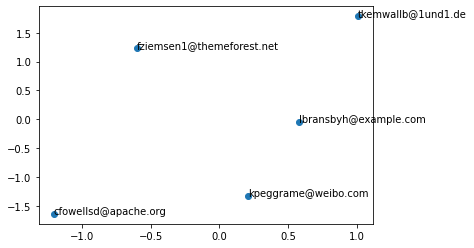

In [87]:
plt.scatter(
  co_ocurrencias_descompuesta[:, 0],
  co_ocurrencias_descompuesta[:, 1],
  #c='blue',
  cmap='viridis'
)
for fila in range(co_ocurrencias_descompuesta.shape[0]):
    x = co_ocurrencias_descompuesta[fila, 0]
    y = co_ocurrencias_descompuesta[fila, 1]
    # print(x, y)
    plt.text(
        x, 
        y,
        co_ocurrencias.index[fila]
    )

plt.show()